# ML210-Assignment 6: Resampling Methods

Dataset needed:
UCI Airfoil Self-Noise Data Set  (https://archive.ics.uci.edu/ml/datasets/diabetes)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/diabetes.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Make an 80/20 train/test split.

In [2]:
target = 'Outcome'
features = list(data.drop(target,axis=1).columns.values)

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)#, stratify=y)

#### Fit a logistic regression model on the training data.

In [3]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

log_rgr = LogisticRegression()
log_rgr = log_rgr.fit(X_train, y_train)

#### Predict the test data.

In [4]:
y_pred = log_rgr.predict(X_test)

#### Plot the ROC curve and compute the AUC score

Logistic Regression AUC: 0.7893617021276595


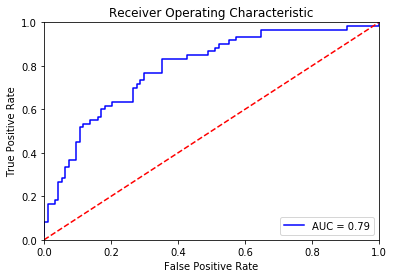

In [5]:
# Plot outputs
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, accuracy_score

%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
probs = log_rgr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

print("Logistic Regression AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Calculate the accuracy metric of the observations in the test set.

In [6]:
from sklearn.metrics import mean_squared_error
import numpy as np

lr_acc = accuracy_score(y_test, y_pred)

print("Logistic Regression accuracy: {}".format(lr_acc))

Logistic Regression accuracy: 0.7402597402597403


## Cross-Validation

## *k-*Fold Cross-Validation

In few sentences, explain how K-fold procedure work.

The k-Fold cross-validation works by first splitting the dataset into k parts (e.g. 10). Then, holding one of the parts out at a time (e.g. k=1), the machine learning algorithm is trained on the remaining dataset (e.g. k=2 to 10) and tested on the part that was left out. This is repeated for each k parts. Then, in the end, the accuracy on each of the k parts is averaged together to get an estimate of the test accuracy that has less bias or variance than if only one part of the dataset was left out for training one time.

Perform linear regression using *k-*fold cross validation, try different values of k and print out the mean accuracy obtained.

In [7]:
from sklearn.model_selection import cross_val_score
from matplotlib.ticker import MaxNLocator

Number of k-Folds =  3, Accuracy = 77.0% (1.9%)
Number of k-Folds =  4, Accuracy = 76.8% (2.8%)
Number of k-Folds =  5, Accuracy = 76.8% (1.9%)
Number of k-Folds = 10, Accuracy = 76.7% (3.5%)
Number of k-Folds = 15, Accuracy = 77.2% (6.0%)
Number of k-Folds = 20, Accuracy = 76.6% (6.9%)


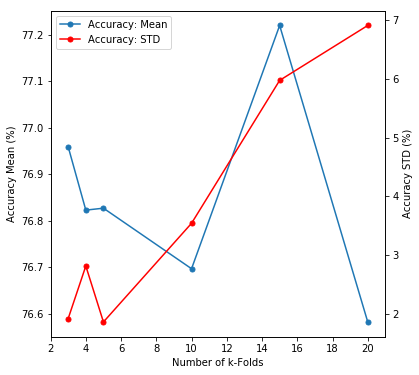

In [8]:
seed = 21
kfolds = [3,4,5,10,15,20]

X = data[features]
y = data[target]

kfold_folds = []
kfold_accuracies = []
kfold_stds = []
for k in kfolds:
    model = LogisticRegression()
    results = cross_val_score(model, X, y, cv=k)
    
    print("Number of k-Folds = %2d, Accuracy = %.1f%% (%.1f%%)" % (k, results.mean() * 100., results.std() * 100.))
    
    kfold_folds.append(k)
    kfold_accuracies.append(results.mean() * 100.)
    kfold_stds.append(results.std() * 100.)

fig,ax = plt.subplots(figsize=(6,6))

l0, = ax.plot(kfold_folds, kfold_accuracies, label='Accuracy: Mean', markersize=5, marker='o')

ax1 = ax.twinx()
l1, = ax1.plot(kfold_folds, kfold_stds, label='Accuracy: STD', markersize=5, marker='o', color='red')

ax.set_ylabel('Accuracy Mean (%)')
ax1.set_ylabel('Accuracy STD (%)')

ax.set_xlabel('Number of k-Folds')

leg = ax.legend([l0, l1], ['Accuracy: Mean', 'Accuracy: STD'], loc='upper left')

ax.set_xlim(kfolds[0]-1, kfolds[-1]+1)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

## The Bootstrap

Print the target class distribution (You can see that there's almost twice as much 0s than 1s)


0    500
1    268
Name: Outcome, dtype: int64


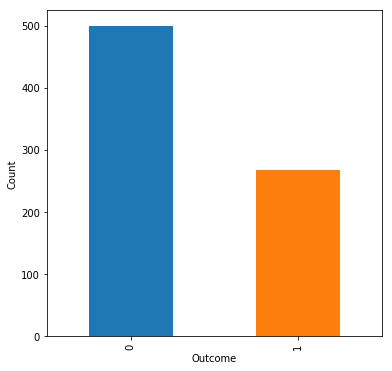

In [9]:
print(data['Outcome'].value_counts())

fig,ax = plt.subplots(figsize=(6,6))

data['Outcome'].value_counts().plot(kind="bar", ax=ax)

ax.set_ylabel('Count')
ax.set_xlabel('Outcome')

plt.show()

Let's perform bootstrapping to up-sample the minority class

1. First, we'll import the resampling module from Scikit-Learn
2. Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class
3. Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

In [10]:
from sklearn.utils import resample

1    500
0    500
Name: Outcome, dtype: int64


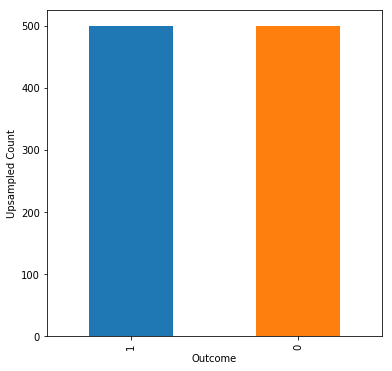

In [11]:
# Separate majority and minority classes
majority_class = data[ data['Outcome']==0 ]
minority_class = data[ data['Outcome']==1 ]
 
# Upsample minority class
minority_upsampled = resample(minority_class, 
                                 replace=True,     # sample with replacement
                                 n_samples=majority_class.shape[0],   # to match majority class
                                 random_state=42)   # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([majority_class, minority_upsampled])
 
# Display new class counts 
# The new DataFrame should now have more observations than the original, and the ratio of the two classes is now 1:1.

print(data_upsampled['Outcome'].value_counts())

fig,ax = plt.subplots(figsize=(6,6))

data_upsampled['Outcome'].value_counts().plot(kind="bar", ax=ax)

ax.set_ylabel('Upsampled Count')
ax.set_xlabel('Outcome')

plt.show()

Let's train another model using Logistic Regression, this time on the balanced dataset

                                      Accuracy   ROC AUC
Original Logistic Regression Model     0.74026  0.789362
Stratified Logistic Regression Model   0.75974  0.811481
Upsampled Logistic Regression Model    0.73500  0.828346


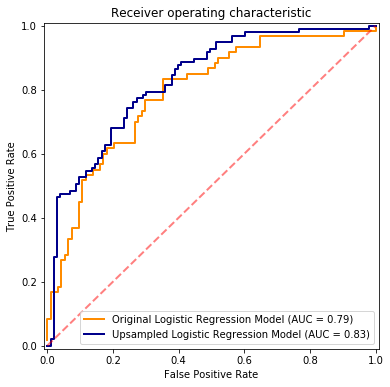

In [12]:
# Separate input features (X) and target variable (y)
target = 'Outcome'
features = list(data_upsampled.drop(target,axis=1).columns.values)

X = data_upsampled[features]
y = data_upsampled[target]

#Perform train test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

# Train model
log_rgr = LogisticRegression()
log_rgr = log_rgr.fit(X_train, y_train)
 
# Predict on training set
y_pred = log_rgr.predict(X_test)

# How's our accuracy? Has it improved? Comment

# calculate the fpr and tpr for all thresholds of the classification
probs = log_rgr.predict_proba(X_test)
preds = probs[:,1]
fpr_up, tpr_up, threshold = metrics.roc_curve(y_test, preds)
roc_auc_up = auc(fpr_up, tpr_up)


lr_acc_up = accuracy_score(y_test, y_pred)
#print("Upsampled Logistic Regression AUC = %.3f" % (roc_auc_up))
#print("Upsampled Logistic Regression accuracy = %.3f" % (lr_acc_up))

#print("Original Logistic Regression AUC = %.3f" % (roc_auc))
#print("Original Logistic Regression accuracy = %.3f" % (lr_acc))


##
X = data[features]
y = data[target]

#Perform train test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21, stratify=y)

# Train model
log_rgr = LogisticRegression()
log_rgr = log_rgr.fit(X_train, y_train)
 
# Predict on training set
y_pred = log_rgr.predict(X_test)

# How's our accuracy? Has it improved? Comment

# calculate the fpr and tpr for all thresholds of the classification
probs = log_rgr.predict_proba(X_test)
preds = probs[:,1]
fpr_strat, tpr_strat, threshold = metrics.roc_curve(y_test, preds)
roc_auc_strat = auc(fpr_strat, tpr_strat)

lr_acc_strat = accuracy_score(y_test, y_pred)

#print("Stratified Logistic Regression AUC = %.3f" % (roc_auc_strat))
#print("Stratified Logistic Regression accuracy = %.3f" % (lr_acc_strat))

accuracies = [lr_acc, lr_acc_strat, lr_acc_up]
roc_aucs = [roc_auc, roc_auc_strat, roc_auc_up]
indices = ['Original Logistic Regression Model', 'Stratified Logistic Regression Model', 'Upsampled Logistic Regression Model']


df = pd.DataFrame({'Accuracy':accuracies, 'ROC AUC':roc_aucs}, index=indices)
print(df)

fig, ax = plt.subplots(figsize=(6,6))
lw = 2
ax.plot(fpr, tpr, color='darkorange', lw=lw, label="Original Logistic Regression Model (AUC = %.2f)" % (roc_auc))
ax.plot(fpr_up, tpr_up, color='darkblue', lw=lw, label="Upsampled Logistic Regression Model (AUC = %.2f)" % (roc_auc_up))
#ax.plot(fpr_strat, tpr_strat, color='darkgreen', lw=lw, label="Stratified Logistic Regression Model (AUC = %.2f)" % (roc_auc_strat))
ax.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--', alpha=0.5)
ax.set_xlim([-0.01, 1.01])
ax.set_ylim([-0.01, 1.01])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic')
leg = ax.legend(loc="lower right")
plt.show()

The AUC of the upsampled model is an improvement from the original logistic regression model and the stratified logistic regression model. The accuracy of the upsampled and original logistic regression models are about the same (~74%), which is to be expected as we trade false positives for false negatives when increasing the minority class.